# Laboratorium 4

Konrad Dębiec

W tym laboratorium wykorzystałem materiał z laboratorium 2, czyli danych o szybkości wykonywania mnożenia dwóch wektorów oraz macierzy z wektorem.

## Zadanie 1, 2

Poniżej odczytuję dane wygenerowane w laboratorium 2. Dane zawierają po 10 pomiarów szybkości działania mnożenia dwóch wektorów oraz macierzy z wektorem dla danego rozmiaru wektora/macierzy (jest łącznie 7 różnych rozmiarów).

In [128]:
measuredTimes = read.csv("measuredTimes.csv")

In [129]:
measuredTimes

vectorSize,dotTime,multiplicationTime
100,9.536743e-07,1.192093e-05
100,9.536743e-07,1.096725e-05
100,0.000000e+00,2.884865e-05
100,0.000000e+00,1.192093e-05
100,9.536743e-07,1.192093e-05
100,0.000000e+00,1.192093e-05
100,0.000000e+00,1.096725e-05
100,9.536743e-07,1.096725e-05
100,0.000000e+00,1.096725e-05
100,0.000000e+00,1.096725e-05


## Zadanie 3, 4

Podczas rysowania wykresów korzystam z pakietu ggplot2

In [130]:
library("ggplot2")

Rysowanie wykresu czasu mnożenia dwóch wektorów od ich rozmiaru wraz ze słupkami błędu

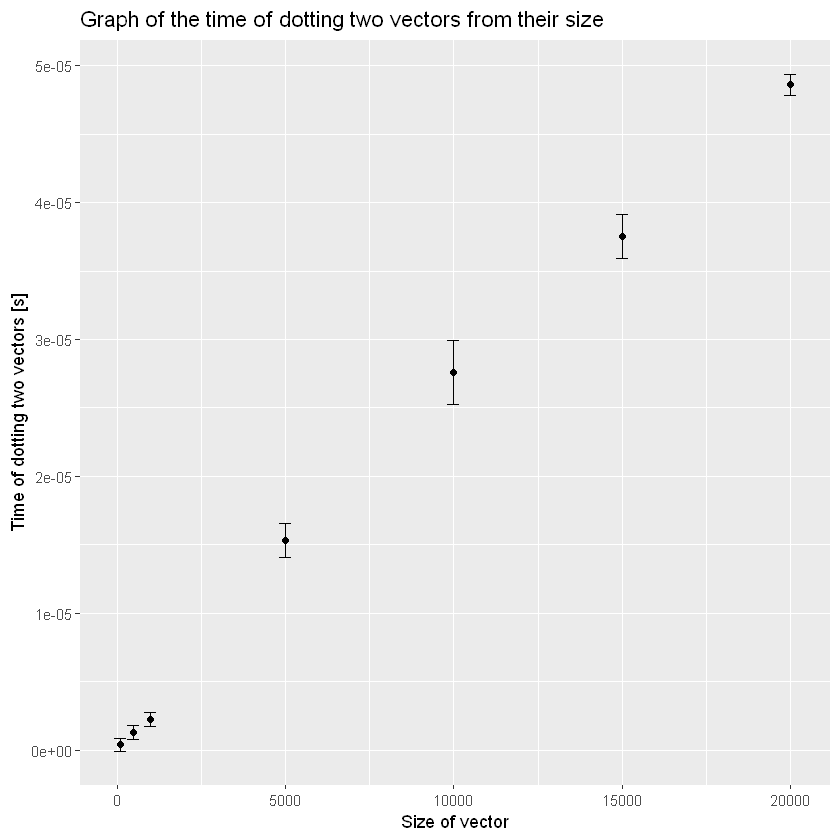

In [131]:
measuredDotTimes = measuredTimes[c(1,2)]
measuredDotTimes_mean = aggregate(dotTime ~ vectorSize, 
                                  data=measuredDotTimes, 
                                  FUN=mean)
measuredDotTimes_mean$var = aggregate(dotTime ~ vectorSize, 
                                      data=measuredDotTimes, 
                                      FUN=sd)$dotTime
plt1 = ggplot(measuredDotTimes_mean, aes(vectorSize,dotTime)) + 
        geom_point() + 
        geom_errorbar(aes(ymin=dotTime - var, ymax=dotTime + var)) + 
        ggtitle("Graph of the time of dotting two vectors from their size") +
        xlab("Size of vector") + 
        ylab("Time of dotting two vectors [s]")
plt1

Rysowanie wykresu czasu mnożenia wektora z macierzą od ich rozmiaru wraz ze słupkami błędu

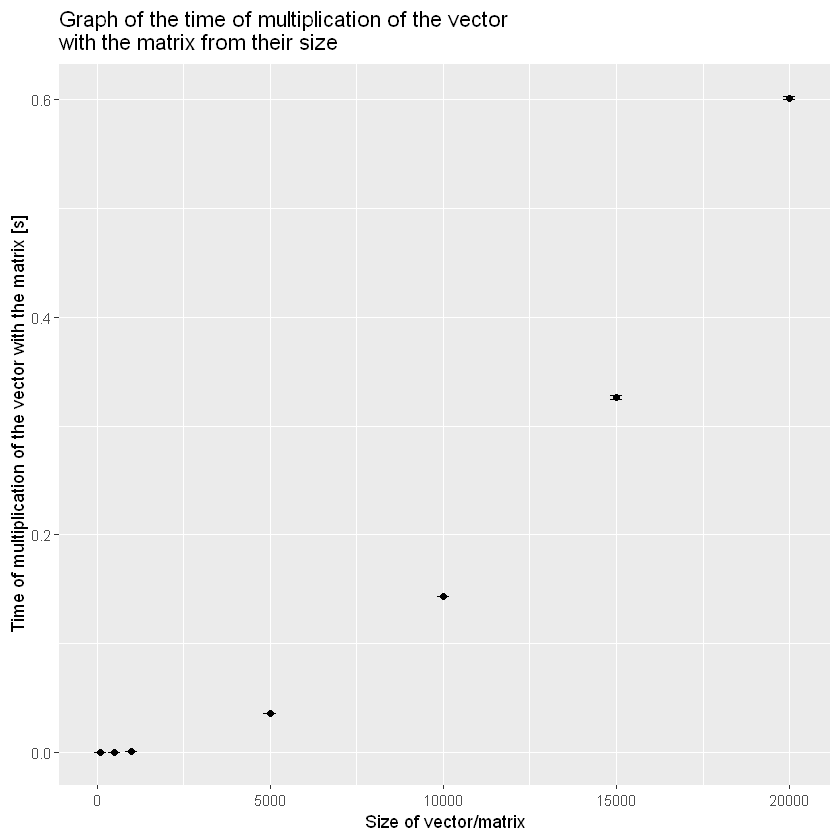

In [132]:
measuredMultiplicationTimes = measuredTimes[c(1,3)]
measuredMultiplicationTimes_mean = aggregate(multiplicationTime ~ vectorSize, 
                                  data=measuredMultiplicationTimes, 
                                  FUN=mean)
measuredMultiplicationTimes_mean$var = aggregate(multiplicationTime ~ vectorSize, 
                                      data=measuredMultiplicationTimes, 
                                      FUN=sd)$multiplicationTime
plt2 = ggplot(measuredMultiplicationTimes_mean, 
              aes(vectorSize, multiplicationTime)) + 
        geom_point() +
        geom_errorbar(aes(ymin=multiplicationTime - var, 
                            ymax=multiplicationTime + var)) + 
        ggtitle("Graph of the time of multiplication of the vector \nwith the matrix from their size") +
        xlab("Size of vector/matrix") + 
        ylab("Time of multiplication of the vector with the matrix [s]")
plt2

## Zadanie 5

Korzystając z regresji liniowej aproksymuję czas mnożenia dwóch wektorów od ich rozmiaru

In [133]:
dotTimesLMApproximation = lm(dotTime ~ poly(vectorSize, 1, raw=TRUE), 
                             data=measuredDotTimes)

Dorysowuję uzyskany wielomian do wykresu

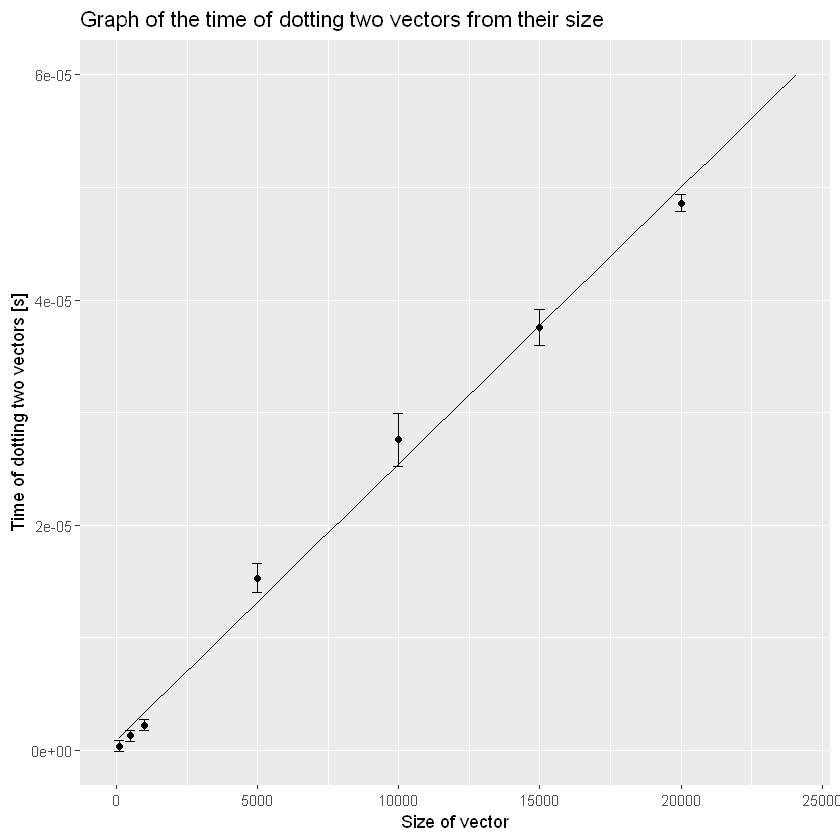

In [134]:
generatedVectorSizes = data.frame(vectorSize = seq(100, 25000, by=1000))
generatedVectorSizes$dotTime = predict(dotTimesLMApproximation, 
                                       generatedVectorSizes)

plt1 + geom_line(data=generatedVectorSizes, 
                 aes(vectorSize, dotTime))

Korzystając z regresji wielomianowej stopnia 2 aproksymuję czas mnożenia dwóch wektorów od ich rozmiaru

In [135]:
multiplicationTimesLMApproximation = 
    lm( multiplicationTime ~ poly(vectorSize, 2, raw=TRUE), 
        data=measuredMultiplicationTimes                    )

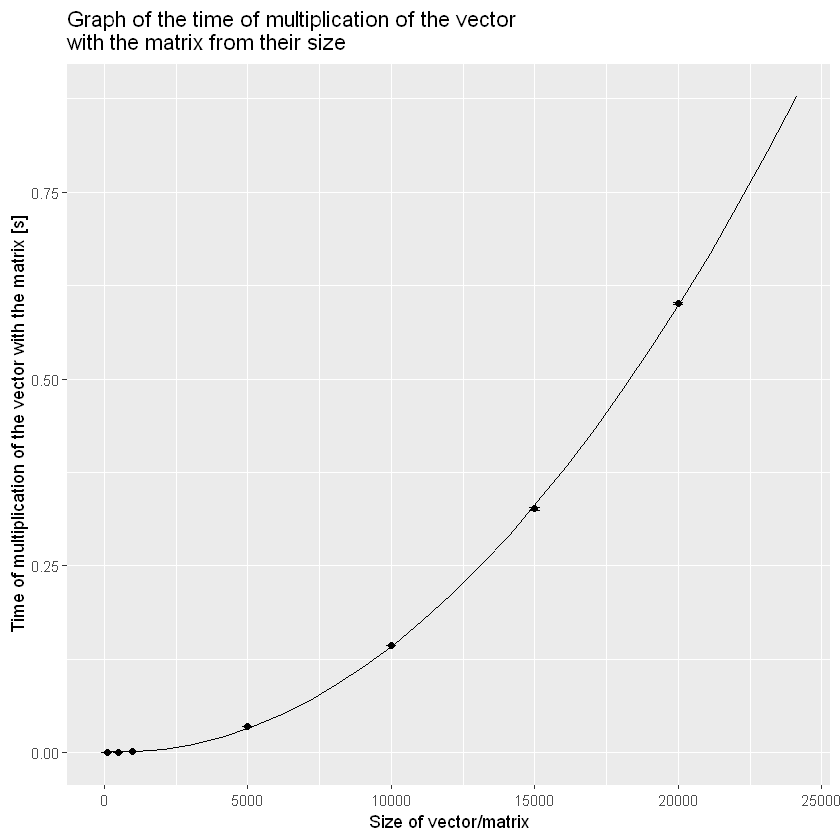

In [136]:
generatedVectorSizes2 = data.frame(vectorSize = seq(100, 25000, by=1000))
generatedVectorSizes2$multiplicationTime = 
        predict( multiplicationTimesLMApproximation, 
                 generatedVectorSizes2              )

plt2 + geom_line(data=generatedVectorSizes2, 
                 aes(vectorSize, multiplicationTime))

## Zadanie 6

W tym zadaniu analizuję liczbę zakażonych koronawirusem w Polsce poprzez aproksymację krzywą wykładniczą danych z ostatnich 14 dni (do momentu pisania notebook'a, czyli 02.04.2020) oraz pierwszych 14 dni. Korzystam z danych znajdujących się w Google Sheets: https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview. Aby sprawnie posługiwać się zawartymi tam danymi korzystam z paczki googlesheets4, która pomaga w przetwarzaniu danych znajdujących się w Google Sheets

In [137]:
install.packages("googlesheets4")
install.packages("tidyverse")

Warning message:
"package 'googlesheets4' is in use and will not be installed"Warning message:
"package 'tidyverse' is in use and will not be installed"

In [138]:
library("googlesheets4")
library("tidyverse")

In [139]:
sheets_deauth()
covidInPoland = read_sheet("https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview",
          range="A:C")

Reading from 'COVID-19 prognoza'
Range "A:C"
New names:
* `` -> ...1


Wyłuskiwanie istotnych w celu przetworzenia danych

In [140]:
covidInPoland = covidInPoland %>% filter(!is.na(raportowane))
covidInPoland = covidInPoland[c(2,3)]
names(covidInPoland)[1] <- "Day"
names(covidInPoland)[2] <- "Reported"
covidInPoland

Day,Reported
0,1
1,1
2,5
3,6
4,11
5,17
6,22
7,31
8,51
9,68


### Aproksymacja na podstawie pierwszych 14 dni

In [141]:
covidInPoland_f14 = head(covidInPoland,14)

In [143]:
covidInPoland_f14

Day,Reported
0,1
1,1
2,5
3,6
4,11
5,17
6,22
7,31
8,51
9,68


In [145]:
covidInPoland_f14_log = lm(log(Reported) ~ Day, 
                           data=covidInPoland_f14)

In [146]:
generatedTime = data.frame(Day = seq(0, 13, by = 0.01))
generatedTime$Reported = exp(predict(covidInPoland_f14_log, generatedTime))

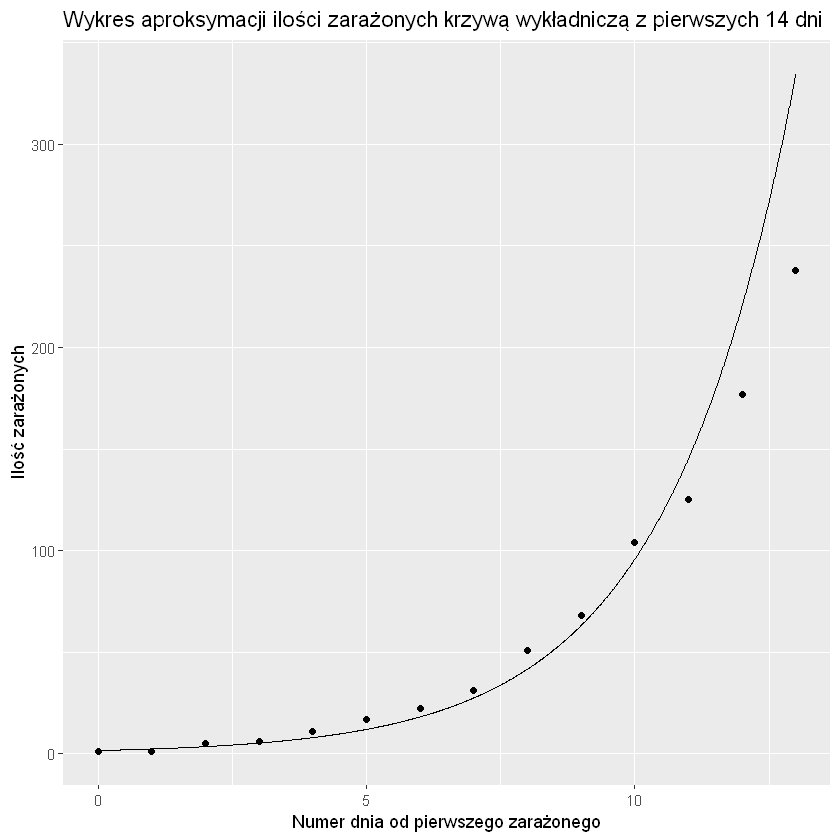

In [147]:
ggplot(covidInPoland_f14, aes(Day,Reported)) + 
    geom_point() + 
    geom_line(data=generatedTime, aes(Day,Reported)) + 
    ggtitle("Wykres aproksymacji ilości zarażonych krzywą wykładniczą z pierwszych 14 dni") +
    xlab("Numer dnia od pierwszego zarażonego") + 
    ylab("Ilość zarażonych")

### Aproksymacja na podstawie ostatnich 14 dni

In [148]:
covidInPoland_e14 = tail(covidInPoland,14)

In [150]:
covidInPoland_e14

Day,Reported
16,425
17,536
18,634
19,749
20,901
21,1051
22,1221
23,1389
24,1638
25,1862


In [151]:
covidInPoland_e14_log = lm(log(Reported) ~ Day, 
                           data=covidInPoland_l14)

In [152]:
generatedTime2 = data.frame(Day = seq(0, first(covidInPoland_e14)[1]+13 + 10, by = 0.01))
generatedTime2$Reported = exp(predict(covidInPoland_e14_log, generatedTime2))

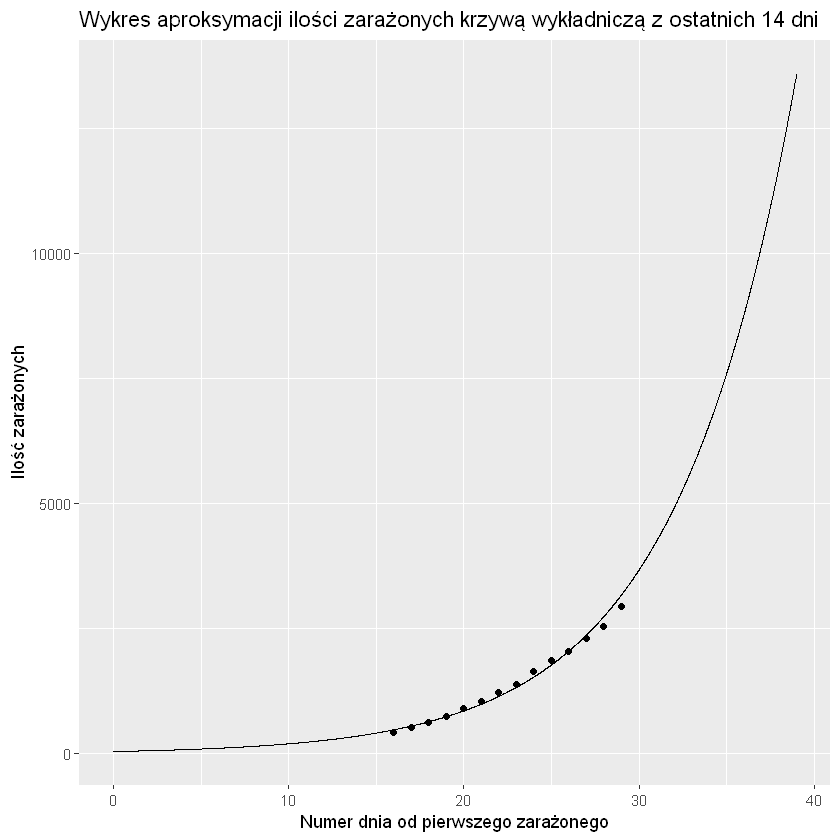

In [153]:
ggplot(covidInPoland_e14, aes(Day,Reported)) + 
    geom_point() + 
    geom_line(data=generatedTime2, aes(Day,Reported)) + 
    ggtitle("Wykres aproksymacji ilości zarażonych krzywą wykładniczą z ostatnich 14 dni") +
    xlab("Numer dnia od pierwszego zarażonego") + 
    ylab("Ilość zarażonych")

Porównując dwa powyższe wykresy możemy dojść do wniosku, że dane z pierwszych 14 dni szybciej zaczynają odstawać od krzywej wykładniczej niż dane z ostatnich 14 dni. Aby jednak lepiej aproksymować skalę pandemii w Polsce posłużę się danymi z całego okresu trwania pandemii w Polsce.

### Aproksymacja na podstawie całego okresu trwania pandemii w Polsce

In [154]:
covidInPoland_log = lm(log(Reported) ~ Day, 
                        data=covidInPoland)

In [155]:
generatedTime3 = data.frame(Day = seq(0, first(tail(covidInPoland[1],1)), by = 0.01))
generatedTime3$Reported = exp(predict(covidInPoland_log, generatedTime3))

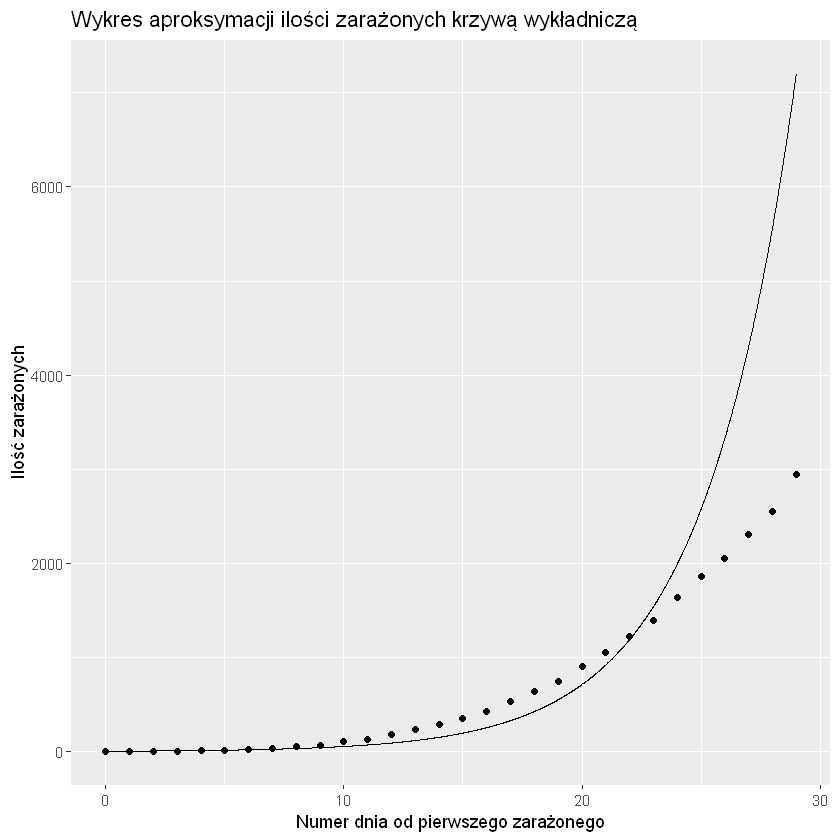

In [156]:
ggplot(covidInPoland, aes(Day,Reported)) + 
    geom_point() + 
    geom_line(data=generatedTime3, aes(Day,Reported)) + 
    ggtitle("Wykres aproksymacji ilości zarażonych krzywą wykładniczą") +
    xlab("Numer dnia od pierwszego zarażonego") + 
    ylab("Ilość zarażonych")

Możemy zauważyć, że ilość zaraportowanych chorych odbiega znacznie od wyrysowanej krzywej wykładniczej. Można wnioskować, że lepszą aproksymację można uzyskać korzystając z wielomianów.